### Covered Strategies 

In this <a href="https://www.python.org/doc/essays/blurb/">Python</a> notebook, we will dive into options hedging strategies named as covered strategies.  
This hedging strategy involves the investor writing an option whilst holding an opposite position on the asset. The motivation for doing so is to generate additional
income by receiving premiums from option buyers, and this strategy is akin to selling insurance. When the writer of an option has no position in the underlying asset, this form of option writing is known as naked writing.
- In a covered call, the investor would hold a long position on an asset and sell a call option written on the same asset.
- In a covered put, the investor would short sell an asset and sell a put option written on the same asset.

To do so, we have to generate multiple scenarios of the underlying asset since its evolution is completely random . To generate such underlying monte_carlo simulations, we will use practical functions of the <a href="https://finance.math.upmc.fr/en/enseignements/1_2_probas_numeriques/">Numerical Probability</a> course from the master's degree <a href="https://finance.math.upmc.fr/en/">M2 Probabilités et Finance</a> taught by both <a href="https://www.lpsm.paris/users/pages/index">Gilles Pagès</a> and <a href="https://perso.lpsm.paris/~vlemaire/site.html">Vincent Lemaire</a> . With their practical hands-on notebooks, we can easily see and plot various scenarios of underlying asset . 

Hence, we then run a notebook called `Monte_Carlo_Simulation.ipynb` where we can find all these functions . We will not provide these functions directly but you can easily implement them to well understand what's going on behind the scenes.

In [1]:
%run Monte_Carlo_Simulation.ipynb  # we run this notebook Monte_Carlo_Simulation 

We then provide all the necessary parameters the function `black_scholes_1d` which displays all the underlying asset scenarios. Here is the <a href="https://www.geeksforgeeks.org/python-docstrings/">docstring</a> of the function : 

The Black and Scholes Process is defined by the following <a href="https://ethz.ch/content/dam/ethz/special-interest/mavt/dynamic-systems-n-control/idsc-dam/Lectures/Stochastic-Systems/SDE.pdf">Stochastic Differential Equation</a>

Let $S_t$ be the solution of the SDE on $[0,T]$
$$
    \operatorname{d}\!S_t = r S_t \operatorname{d}\!t + \sigma S_t \operatorname{d}\!B_t, \quad S_0 = x
$$
Then $S_t$ is given by : 
$$
    S_t = x \exp \bigl((r- \sigma^2/2) t + \sigma B_t \bigr)
$$


`black_scholes_1d` : Simulate paths of Black-Scholes process
-    Args:
       - n_times: Number of timesteps
       - n_paths: Number of paths 
       - final_time: Final time of simulation
       - init_value: `S0`
       - r: Interest rate
       - sigma: Volatility
       - random_state: `np.random.Generator` used for simulation
-    Returns:
       - `np.array` of shape `(n_times+1, n_paths)` containing the paths 
       
We then define the function parameters and plot our results to see what happens . 

In [2]:
N = 5 
M = 500
S0 = 100
r, sigma = 0.1, 0.2
D = 0 
T = 1 
K = 101
St = black_scholes_1d(N, M, init_value=S0, r=r, sigma=sigma) # Paths of BS Process 

In [3]:
St[:10] # display the first 10 element of the underlying asset array 

array([[100.        , 100.        , 100.        , ..., 100.        ,
        100.        , 100.        ],
       [106.06185505, 118.36953645,  99.42333058, ...,  99.70180988,
         90.33990173,  95.60275423],
       [ 98.74639666, 103.55753566, 106.34124411, ...,  93.54091139,
         82.62997739,  96.64906443],
       [ 92.29691359, 111.77623722, 102.2806862 , ..., 104.79215288,
         73.90244233,  88.26160785],
       [106.45308895, 134.31369632,  99.32806239, ..., 106.66619082,
         73.46500315,  78.69964019],
       [107.74533291, 121.70640617,  89.6065076 , ..., 109.79628281,
         79.48566718,  90.60537404]])

In [4]:
import seaborn as sns
sns.set_theme()

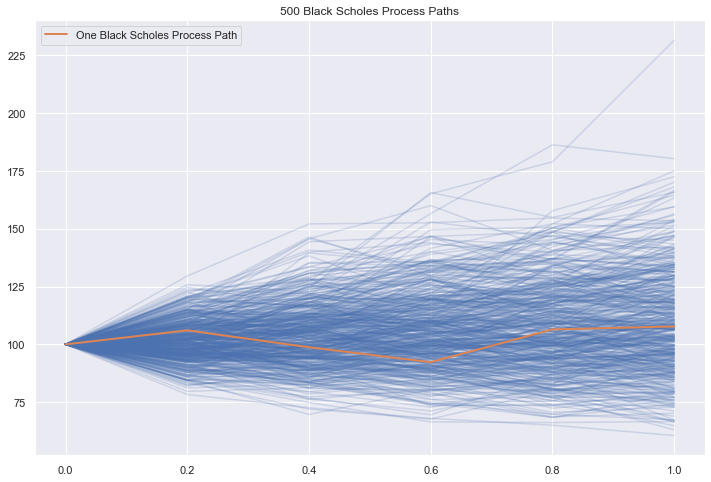

In [5]:
plt.figure(figsize=(12,8))
times = np.arange(N+1)*(T / N)
for S in St.T:
    sns.lineplot(x=times, y=S, color='C0', alpha=0.2)
ax = sns.lineplot(x=times, y=St[:,0], color='C1', lw=2, label='One Black Scholes Process Path')
ax.set(title=f"{M} Black Scholes Process Paths");

We can see in the preceding graph, 500 simulations of Black and Scholes Process. 

The next step is to store the last maturity time values of the BS process that is : Values of $S_t$ for which $t=T$ which is $1$ in our case . Why ? Because, we want to represent the <a href="https://www.math.fsu.edu/~paris/FMexam/DM%20Module%201.pdf">Payoff</a> of covered options strats and because the payoff is generally computed at the maturity for <a href="https://www.schwab.com/options/what-is-trading-options">options</a> . 

In [6]:
stock_prices = St.T[:,-1]  # We store the last values at the maturity T of our stock_prices vector 

We then <a href="https://www.geeksforgeeks.org/introduction-to-sorting-algorithm/">sort</a> our stock_prices vector in order to well represent the payoff since our simulations are purely random. To sort our vector, we used <a href="https://numpy.org/doc/stable/reference/generated/numpy.sort.html">`np.sort`</a> which has <a href="https://blog.finxter.com/how-to-sort-in-one-line/#:~:text=The%20runtime%20complexity%20of%20the,log(n))%20on%20average.">nlog(n)</a> complexity which the most efficient algorithm to sort tables in modern programming languages .

In [7]:
stock_prices = np.sort(stock_prices) # sort our stock_prices 

### Covered Call Strategy

$\textit{Covered Call}$ : A covered call is an investment strategy constructed by buying a stock and
selling an $OTM$ call option on the same stock

The value of the strategy at time $t$ is given by :
$$
\Pi_t = S_t - C(S_t,t;K,T)
$$



The payoff of this strategy a $T$ is : 

$$
\Psi(S_T) = S_T - C(S_T,T;K,T)= 
\begin{cases} 
K & \text{if } S_T \geq K, \\
S_T & \text{if } S_T < K.
\end{cases}
$$

The profit of this strategy is given by :

$$
\Gamma(S_T) = \Psi(S_T) - \Pi_t= S_T - C(S_T,T;K,T) - S_t + C(S_t, t; T, K)= 
\begin{cases} 
K - S_t + C(S_t, t; K, T) & \text{if } S_T \geq K, \\
S_T - S_t + C(S_t, t; K, T) & \text{if } S_T < K.
\end{cases}
$$

Before plotting the Profit diagram of the covered call strategy, we have to compute the option premium . Thanks to our `EuropeanOptions` class we implemented in previous notebook you can find on my github <a href="https://github.com/Ncxs99/Financial-Mathematics/blob/master/Equity%20Derivatives%20Pricing/European%20Options/Europea_Options.ipynb">Ncxs99</a> . We then use our class to directly find the premium of the corresponding $OTM$ option .

In [8]:
premium = EuropeanOptions(S0,K,T,sigma,r,D)
premium = premium.Call_Black_Scholes()
premium

12.684983116938433

After compute the option price , then here is how we proceed to display the profit of the covered call strategy : 
- Compute `stock_profit` which is in fact the profit the investor can make only the stock options . 
`stock_profit` = `stock_prices` - `S0` where `S0` is the acquiring cost the underlying asset 

- Compute the `short_call_profit` which is in fact the profit earn only on the options positions . `short_call_profit` = `Payoff_Short_Call_Option_Maturity` + `Premium`

In [9]:
stock_profit = stock_prices - S0  # stock_profit 
short_call_profit = np.minimum(0, K - stock_prices) + premium  # short_call_profit 
covered_call_profit = stock_profit + short_call_profit # covered_call_profit 

We then plot the profit of a covered call 

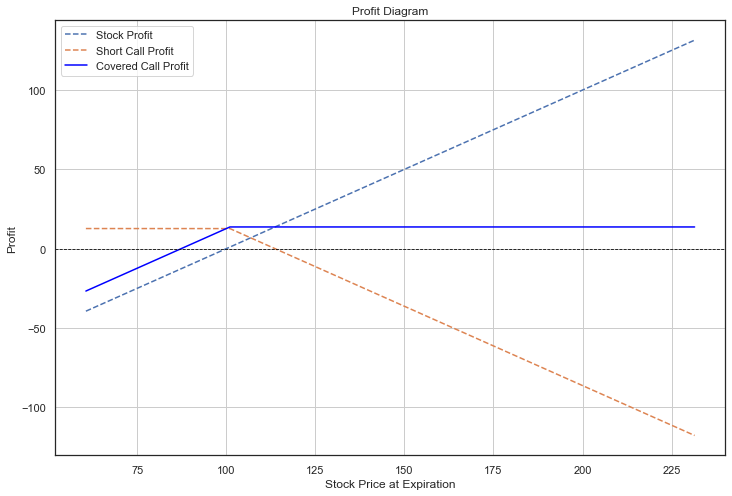

In [10]:
sns.set_theme(style='white')
plt.figure(figsize=(12, 8))
plt.plot(stock_prices, stock_profit, label="Stock Profit", linestyle='--')
plt.plot(stock_prices, short_call_profit, label="Short Call Profit", linestyle='--')
plt.plot(stock_prices, covered_call_profit, label="Covered Call Profit", color="blue")
plt.axhline(0, color='black', linewidth=0.8, linestyle="--")
plt.title("Profit Diagram")
plt.xlabel("Stock Price at Expiration")
plt.ylabel("Profit")
plt.legend()
plt.grid()
plt.show()

### Covered Call Greeks

Covered Call Greeks are just the greeks of a short call option, except fo the delta which is positive. Here are the main Covered Call greeks in the following image 

<img src="CCG.png" alt="Transposition of a vector" title="Vector transposition" width="700"> .

Here are the main characteristics of the greeks of the covered call :

- Positive Delta 

- Negative Gamma 

- Positive Theta

- Negative Vega  

- Negative Rho

### Covered put 

$\textit{Covered Put}$ : A covered put is a hedging strategy constructed by selling a stock and selling
an $OTM$ put option on the same stock.


The value of the strategy at time $t$ is given by :
$$
\Pi_t = - S_t - P(S_t,t;K,T)
$$



The payoff of this strategy a $T$ is : 

$$
\Psi(S_T) = - S_T - P(S_T,T;K,T)= 
\begin{cases} 
- S_T & \text{if } S_T \geq K, \\
- K & \text{if } S_T < K.
\end{cases}
$$

The profit of this strategy is given by :

$$
\Gamma(S_T) = \Psi(S_T) - \Pi_t= - S_T - P(S_T,T;K,T) + S_t + P(S_t, t; T, K)= 
\begin{cases} 
S_t - S_T + P(S_t, t; K, T) & \text{if } S_T \geq K, \\
S_t - K + P(S_t, t; K, T) & \text{if } S_T < K.
\end{cases}
$$

Before plotting the Profit diagram of the covered put strategy, we have to compute the option premium . Thanks to our `EuropeanOptions` class we implemented in previous notebook you can find on my github <a href="https://github.com/Ncxs99/Financial-Mathematics/blob/master/Equity%20Derivatives%20Pricing/European%20Options/Europea_Options.ipynb">Ncxs99</a> . We then use our class to directly find the premium of the corresponding $OTM$ option .

In [11]:
premium = EuropeanOptions(S0,K,T,sigma,r,D)
premium = premium.Put_Black_Scholes()
premium

4.073562338570337

After compute the option price , then here is how we proceed to display the profit of the covered call strategy : 
- Compute `stock_profit` which is in fact the profit the investor can make only the stock options . 
`stock_profit` = -`stock_prices` + `S0` where `S0` is the acquiring cost the underlying asset 

- Compute the `short_put_profit` which is in fact the profit earn only on the options positions . `short_put_profit` = `Payoff_Short_Put_Option_Maturity` + `Premium`

In [12]:
stock_profit = - stock_prices + S0  # stock_profit 
short_put_profit = np.minimum(0, stock_prices - K) + premium  # short_put_profit 
covered_put_profit = stock_profit + short_put_profit # covered_put_profit

We then plot the covered put 

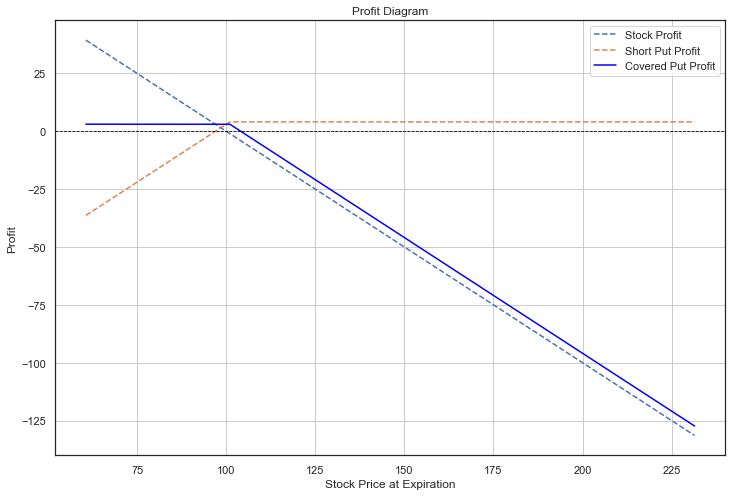

In [13]:
sns.set_theme(style='white')
plt.figure(figsize=(12, 8))
plt.plot(stock_prices, stock_profit, label="Stock Profit", linestyle='--')
plt.plot(stock_prices, short_put_profit, label="Short Put Profit", linestyle='--')
plt.plot(stock_prices, covered_put_profit, label="Covered Put Profit", color="blue")
plt.axhline(0, color='black', linewidth=0.8, linestyle="--")
plt.title("Profit Diagram")
plt.xlabel("Stock Price at Expiration")
plt.ylabel("Profit")
plt.legend()
plt.grid()
plt.show()

### Covered Put Greeks

Covered Put Greeks are just the greeks of a short Put option, except fo the delta which is negative. Here are the main Covered Put greeks in the following image 

<img src="CPG.png" alt="Transposition of a vector" title="Vector transposition" width="700"> .

Here are the main characteristics of the greeks of the covered call :

- Negative Delta 

- Negative Gamma 

- Positive Theta

- Negative Vega  

- Positive Rho